# Ejemplo

d) Select five assets from the market, calculate their returns, and, with this, calculate the expected return and
the covariance matrix. Once these parameters are obtained, the optimization problem will be solved, and
investment recommendations will be generated. Remember to verify that each of the assets has sufficient
liquidity.

## Fórmula para $w$ que optimiza el ratio de Sharpe
$$
w = \frac{\Sigma^{-1} (\mu - r_f 1)}{1^T \Sigma^{-1} (\mu - r_f 1)}
$$

- $w = [w_1,w_2,...,w_n]$ : vector de pesos de los activos del portafolio
- $\mu = [\mu_1,\mu_2,...,\mu_3]$ : vector del valor esperado de cada uno de los activos
- $\Sigma$: la matriz de covarianza de los rendimientos de los activos
- $r_f$: la tasa libre de riesgo
- $1$: vector de unos

## Código

### Librerías

In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

### Obtención de datos

In [39]:
tickers=['AMZN','WMT','GOOGL','AAPL','JPM']

f_inicial='2020-01-01'
f_final='2024-11-10'

datos1=yf.download(tickers,f_inicial,f_final)['Adj Close']

rt = datos1.pct_change().dropna()

[*********************100%***********************]  5 of 5 completed


### Cálculo de variables importantes

In [40]:
mu = (rt.mean() * 252).values  # Rendimientos esperados
sigma = rt.cov().values  # Matriz de covarianza
sigma_inv = np.linalg.inv(sigma)  # Matriz de covarianza inversa
rf = 0.04413  # Tasa libre de riesgo
unos = np.ones(len(mu)) # Vector de unos
mu_rf = mu - np.dot(rf,unos) # Rendimientos esperados en exceso

### Uso de fórmula para $w$

In [41]:
w = np.dot(sigma_inv,mu_rf)/ np.dot(unos.T,np.dot(sigma_inv,mu_rf))

### Cálculo del retorno, volatilidad y Sharpe Ratio del portafolio

- $\mu_p = w^{^T}\mu$
- $\sigma_p = \sqrt{ w^{T} \Sigma w}$
- $sr = \frac{\mu_p - r_f}{\sigma_p}$

In [42]:
ret = np.dot(w.T, mu) # Rendimiento esperado del portafolio
risk = np.sqrt(np.dot(w.T, np.dot(sigma, w))) * np.sqrt(252) # Volatilidad del portafolio
sharpe = (ret - rf) / risk # Sharpe ratio

### Resultados

In [43]:
w_df = pd.DataFrame(w, index=tickers, columns=['w'])

print(f'Rendimiento esperado: {ret:.6%}')
print(f'Volatilidad: {risk:.6%}')
print(f'Ratio de sharpe: {sharpe:.6f}')



display(Markdown('### Valores del vector $w$:'))
display(w_df.T)

Rendimiento esperado: 23.459517%
Volatilidad: 21.499181%
Ratio de sharpe: 0.885918


### Valores del vector $w$:

,AMZN,WMT,GOOGL,AAPL,JPM
w,0.342612,-0.031619,0.153063,0.059,0.476943


### Gráfia con los pesos óptimos

Return: 0.234595
Risk: 0.214992
Sharpe ratio: 0.885918



,AMZN,WMT,GOOGL,AAPL,JPM
w,0.342612,-0.031619,0.153063,0.059,0.476943


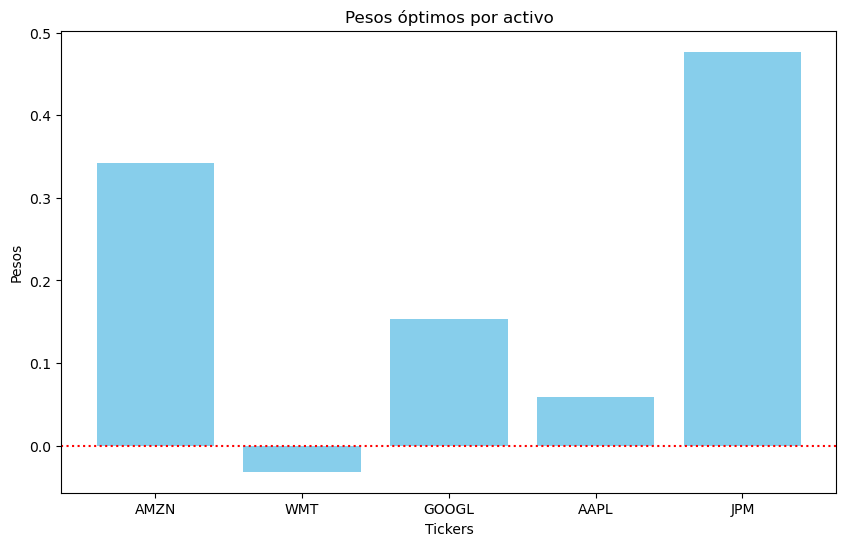

In [44]:
# Crear gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(tickers, w, color='skyblue')

# Línea en y = 0
plt.axhline(0, color='red', linestyle=':')

# Etiquetas
plt.xlabel('Tickers')
plt.ylabel('Pesos')
plt.title('Pesos óptimos por activo')

# Mostrar métricas y gráfica
print(f'Return: {ret:.6f}')
print(f'Risk: {risk:.6f}')
print(f'Sharpe ratio: {sharpe:.6f}')
print()
display(w_df.T)